<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/examples/wadda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/skywalker0803r/autorch.git

fatal: destination path 'autorch' already exists and is not an empty directory.


In [2]:
from autorch.autorch import transferlearning
import torch
from torch import nn
from torch.autograd import Function
from torch import optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.utils import shuffle
import warnings 
warnings.simplefilter('ignore')

In [3]:
def normalize(x):
  return x/x.sum(axis=1).values.reshape(-1,1)

# Load Data

In [4]:
src_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/train_4565.csv',index_col=0))
tgt_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/test_250.csv',index_col=0))

# get columns_name
x_col = ['T10','T50','T90','N+A']
N_col = ['C5N','C6N','C6A','C7N','C7A','C8N','C8A','C9N','C9A','C10N','C10A']
P_col = ['C5NP','C5IP','C6NP','C6IP','C7NP','C7IP','C8NP','C8IP','C9NP','C9IP','C10NP','C10IP']
y_col = src_data.drop(x_col,axis=1).columns.tolist()

# split some data for final testing
tgt_data,final_test_data = tgt_data.iloc[:200],tgt_data.iloc[200:]

# instance WADDA model

In [5]:
src_x,src_y = src_data[x_col],src_data[y_col]
tgt_x,tgt_y = tgt_data[x_col],tgt_data[y_col]
model = transferlearning.WADDA(src_x,src_y,tgt_x,tgt_y)

# Fit Xgboost

In [6]:
xgb_200 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(tgt_x,tgt_y)
xgb_4765 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(src_x.append(tgt_x),src_y.append(tgt_y))

# Fit WADDA

  1%|          | 34/3000 [00:00<00:08, 334.76it/s]

start train
ep:0 loss:3.8508307933807373


  5%|▍         | 147/3000 [00:00<00:07, 357.79it/s]

ep:100 loss:3.0577571392059326


  9%|▉         | 263/3000 [00:00<00:07, 371.12it/s]

ep:200 loss:1.31139075756073


 12%|█▏        | 372/3000 [00:01<00:07, 361.18it/s]

ep:300 loss:0.9219638705253601


 15%|█▍        | 446/3000 [00:01<00:07, 362.84it/s]

ep:400 loss:0.7473364472389221


 19%|█▊        | 558/3000 [00:01<00:06, 368.05it/s]

ep:500 loss:0.551601231098175


 22%|██▏       | 670/3000 [00:01<00:06, 368.29it/s]

ep:600 loss:0.5400583148002625


 25%|██▍       | 743/3000 [00:02<00:06, 355.36it/s]

ep:700 loss:0.3956417441368103


 28%|██▊       | 852/3000 [00:02<00:06, 354.69it/s]

ep:800 loss:0.4429309666156769


 32%|███▏      | 964/3000 [00:02<00:05, 361.71it/s]

ep:900 loss:0.32528042793273926


 35%|███▍      | 1037/3000 [00:02<00:05, 352.80it/s]

ep:1000 loss:0.37979793548583984


 38%|███▊      | 1146/3000 [00:03<00:05, 353.61it/s]

ep:1100 loss:0.3325847089290619


 42%|████▏     | 1256/3000 [00:03<00:04, 357.33it/s]

ep:1200 loss:0.29353418946266174


 46%|████▌     | 1366/3000 [00:03<00:04, 358.69it/s]

ep:1300 loss:0.4763466417789459


 48%|████▊     | 1438/3000 [00:04<00:04, 343.46it/s]

ep:1400 loss:0.2902403771877289


 52%|█████▏    | 1548/3000 [00:04<00:04, 348.76it/s]

ep:1500 loss:0.29102179408073425


 55%|█████▌    | 1659/3000 [00:04<00:03, 361.62it/s]

ep:1600 loss:0.33208271861076355


 59%|█████▉    | 1771/3000 [00:04<00:03, 362.38it/s]

ep:1700 loss:0.2491176873445511


 62%|██████▏   | 1845/3000 [00:05<00:03, 360.29it/s]

ep:1800 loss:0.2711244225502014


 65%|██████▌   | 1956/3000 [00:05<00:03, 338.20it/s]

ep:1900 loss:0.2785637676715851


 69%|██████▉   | 2065/3000 [00:05<00:02, 352.51it/s]

ep:2000 loss:0.33894944190979004


 71%|███████▏  | 2138/3000 [00:05<00:02, 352.61it/s]

ep:2100 loss:0.22812248766422272


 75%|███████▍  | 2248/3000 [00:06<00:02, 355.67it/s]

ep:2200 loss:0.341101735830307


 79%|███████▊  | 2358/3000 [00:06<00:01, 358.43it/s]

ep:2300 loss:0.25828713178634644


 82%|████████▏ | 2467/3000 [00:06<00:01, 355.00it/s]

ep:2400 loss:0.34220752120018005


 85%|████████▍ | 2539/3000 [00:07<00:01, 349.98it/s]

ep:2500 loss:0.32045531272888184


 88%|████████▊ | 2647/3000 [00:07<00:01, 341.18it/s]

ep:2600 loss:0.2541344463825226


 92%|█████████▏| 2751/3000 [00:07<00:00, 335.64it/s]

ep:2700 loss:0.30936846137046814


 95%|█████████▌| 2860/3000 [00:08<00:00, 348.92it/s]

ep:2800 loss:0.47406330704689026


 99%|█████████▉| 2967/3000 [00:08<00:00, 344.78it/s]

ep:2900 loss:0.26540660858154297


100%|██████████| 3000/3000 [00:08<00:00, 353.81it/s]


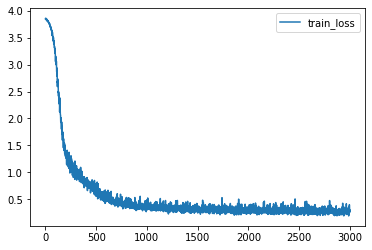

  0%|          | 25/10000 [00:00<01:23, 119.99it/s]

ep:0 d_loss:0.042404286563396454 t_loss:0.023470528423786163 r_loss:2.7236526012420654


  1%|          | 116/10000 [00:00<01:20, 123.47it/s]

ep:100 d_loss:-0.1811017394065857 t_loss:-0.6261957883834839 r_loss:1.6039857864379883


  2%|▏         | 221/10000 [00:01<01:19, 123.58it/s]

ep:200 d_loss:0.04592496156692505 t_loss:-0.6161963939666748 r_loss:1.1593410968780518


  3%|▎         | 314/10000 [00:02<01:17, 125.13it/s]

ep:300 d_loss:-0.01623360440135002 t_loss:-0.05007084086537361 r_loss:0.9663388729095459


  4%|▍         | 418/10000 [00:03<01:18, 122.55it/s]

ep:400 d_loss:-0.04204149544239044 t_loss:0.1985558569431305 r_loss:0.8908941745758057


  5%|▌         | 522/10000 [00:04<01:15, 124.82it/s]

ep:500 d_loss:-0.014798946678638458 t_loss:-0.08575516194105148 r_loss:0.8853898048400879


  6%|▌         | 615/10000 [00:04<01:13, 127.33it/s]

ep:600 d_loss:0.04103976488113403 t_loss:-0.18730369210243225 r_loss:0.78475421667099


  7%|▋         | 722/10000 [00:05<01:12, 127.29it/s]

ep:700 d_loss:-0.07200891524553299 t_loss:0.1562465876340866 r_loss:0.7511159777641296


  8%|▊         | 826/10000 [00:06<01:13, 124.16it/s]

ep:800 d_loss:-0.011902179569005966 t_loss:-0.017261583358049393 r_loss:0.7637108564376831


  9%|▉         | 918/10000 [00:07<01:14, 122.33it/s]

ep:900 d_loss:0.016497835516929626 t_loss:-0.1536981463432312 r_loss:0.6988811492919922


 10%|█         | 1022/10000 [00:08<01:17, 116.24it/s]

ep:1000 d_loss:-0.05116397887468338 t_loss:0.11182533949613571 r_loss:0.6789146661758423


 11%|█▏        | 1125/10000 [00:09<01:12, 122.61it/s]

ep:1100 d_loss:-0.009993743151426315 t_loss:-0.03425505757331848 r_loss:0.5754056572914124


 12%|█▏        | 1219/10000 [00:09<01:08, 128.61it/s]

ep:1200 d_loss:-0.0010615140199661255 t_loss:-0.070599265396595 r_loss:0.6077471375465393


 13%|█▎        | 1323/10000 [00:10<01:09, 124.96it/s]

ep:1300 d_loss:-0.032108958810567856 t_loss:0.02228780835866928 r_loss:0.593963623046875


 14%|█▍        | 1414/10000 [00:11<01:08, 124.92it/s]

ep:1400 d_loss:-0.005415186285972595 t_loss:-0.06026795506477356 r_loss:0.5939092040061951


 15%|█▌        | 1519/10000 [00:12<01:08, 124.21it/s]

ep:1500 d_loss:-0.03810759261250496 t_loss:0.05477604269981384 r_loss:0.621512234210968


 16%|█▌        | 1623/10000 [00:13<01:08, 122.78it/s]

ep:1600 d_loss:-0.011283889412879944 t_loss:-0.07123734802007675 r_loss:0.5847398638725281


 17%|█▋        | 1714/10000 [00:13<01:07, 123.44it/s]

ep:1700 d_loss:-0.024476997554302216 t_loss:0.016939187422394753 r_loss:0.5923716425895691


 18%|█▊        | 1820/10000 [00:14<01:04, 127.67it/s]

ep:1800 d_loss:-0.015793366357684135 t_loss:-0.023607466369867325 r_loss:0.551604151725769


 19%|█▉        | 1912/10000 [00:15<01:04, 126.26it/s]

ep:1900 d_loss:-0.017396919429302216 t_loss:-0.004859063774347305 r_loss:0.5737207531929016


 20%|██        | 2014/10000 [00:16<01:07, 118.91it/s]

ep:2000 d_loss:-0.018327906727790833 t_loss:-0.0008059411775320768 r_loss:0.5540609955787659


 21%|██        | 2118/10000 [00:17<01:03, 123.70it/s]

ep:2100 d_loss:-0.023441996425390244 t_loss:-0.004576218780130148 r_loss:0.5577153563499451


 22%|██▏       | 2220/10000 [00:17<01:04, 119.75it/s]

ep:2200 d_loss:-0.027091121301054955 t_loss:0.016990192234516144 r_loss:0.5244776010513306


 23%|██▎       | 2324/10000 [00:18<01:01, 124.66it/s]

ep:2300 d_loss:-0.016213657334446907 t_loss:-0.021362707018852234 r_loss:0.5721383094787598


 24%|██▍       | 2415/10000 [00:19<01:04, 118.07it/s]

ep:2400 d_loss:-0.01893932931125164 t_loss:-0.0023043479304760695 r_loss:0.5473326444625854


 25%|██▌       | 2513/10000 [00:20<01:04, 116.47it/s]

ep:2500 d_loss:-0.017738550901412964 t_loss:-0.04662130028009415 r_loss:0.47056618332862854


 26%|██▌       | 2620/10000 [00:21<01:05, 112.47it/s]

ep:2600 d_loss:-0.016780057922005653 t_loss:-0.010674196295440197 r_loss:0.528922438621521


 27%|██▋       | 2716/10000 [00:22<01:05, 111.09it/s]

ep:2700 d_loss:-0.024460744112730026 t_loss:0.014043271541595459 r_loss:0.520980179309845


 28%|██▊       | 2812/10000 [00:23<01:06, 108.43it/s]

ep:2800 d_loss:-0.016282984986901283 t_loss:-0.02354804053902626 r_loss:0.5240063667297363


 29%|██▉       | 2913/10000 [00:24<01:05, 108.51it/s]

ep:2900 d_loss:-0.01989310048520565 t_loss:-0.006014199927449226 r_loss:0.4641745686531067


 30%|███       | 3016/10000 [00:25<01:05, 106.79it/s]

ep:3000 d_loss:-0.02186669409275055 t_loss:0.0028259260579943657 r_loss:0.4875567853450775


 31%|███       | 3119/10000 [00:26<01:02, 110.36it/s]

ep:3100 d_loss:-0.019279900938272476 t_loss:0.0011975958477705717 r_loss:0.4875076115131378


 32%|███▏      | 3214/10000 [00:26<00:59, 114.60it/s]

ep:3200 d_loss:-0.027883296832442284 t_loss:0.009840563870966434 r_loss:0.5021239519119263


 33%|███▎      | 3320/10000 [00:27<01:01, 108.17it/s]

ep:3300 d_loss:-0.017574794590473175 t_loss:-0.023114200681447983 r_loss:0.5249322652816772


 34%|███▍      | 3424/10000 [00:28<00:58, 111.54it/s]

ep:3400 d_loss:-0.02259296365082264 t_loss:-9.951218089554459e-05 r_loss:0.48378944396972656


 35%|███▌      | 3516/10000 [00:29<00:58, 111.44it/s]

ep:3500 d_loss:-0.021099071949720383 t_loss:0.0009142652270384133 r_loss:0.4855719804763794


 36%|███▌      | 3620/10000 [00:30<00:58, 109.30it/s]

ep:3600 d_loss:-0.021144242957234383 t_loss:0.0057503413408994675 r_loss:0.4622150957584381


 37%|███▋      | 3714/10000 [00:31<00:56, 111.09it/s]

ep:3700 d_loss:-0.020090926438570023 t_loss:-0.009428504854440689 r_loss:0.47738489508628845


 38%|███▊      | 3815/10000 [00:32<00:53, 115.48it/s]

ep:3800 d_loss:-0.022168155759572983 t_loss:-0.01363991480320692 r_loss:0.4612133204936981


 39%|███▉      | 3917/10000 [00:33<00:50, 121.57it/s]

ep:3900 d_loss:-0.021617088466882706 t_loss:0.006949159316718578 r_loss:0.45783305168151855


 40%|████      | 4021/10000 [00:34<00:50, 118.77it/s]

ep:4000 d_loss:-0.020000699907541275 t_loss:0.005995767191052437 r_loss:0.520013153553009


 41%|████      | 4124/10000 [00:34<00:47, 124.33it/s]

ep:4100 d_loss:-0.015188544988632202 t_loss:-0.028083503246307373 r_loss:0.4818054139614105


 42%|████▏     | 4214/10000 [00:35<00:48, 120.54it/s]

ep:4200 d_loss:-0.020709998905658722 t_loss:-0.01610020361840725 r_loss:0.44374701380729675


 43%|████▎     | 4317/10000 [00:36<00:47, 119.78it/s]

ep:4300 d_loss:-0.02466363087296486 t_loss:0.019785156473517418 r_loss:0.49153849482536316


 44%|████▍     | 4421/10000 [00:37<00:46, 119.35it/s]

ep:4400 d_loss:-0.01902632601559162 t_loss:-0.021939538419246674 r_loss:0.47547289729118347


 45%|████▌     | 4524/10000 [00:38<00:44, 123.91it/s]

ep:4500 d_loss:-0.01769310235977173 t_loss:-0.016505219042301178 r_loss:0.45014017820358276


 46%|████▋     | 4626/10000 [00:39<00:44, 121.88it/s]

ep:4600 d_loss:-0.013936035335063934 t_loss:-0.03295174241065979 r_loss:0.4113818407058716


 47%|████▋     | 4716/10000 [00:39<00:47, 110.82it/s]

ep:4700 d_loss:-0.016077686101198196 t_loss:-0.035086341202259064 r_loss:0.43515098094940186


 48%|████▊     | 4817/10000 [00:40<00:41, 124.41it/s]

ep:4800 d_loss:-0.01969880238175392 t_loss:-0.006818604189902544 r_loss:0.4380794167518616


 49%|████▉     | 4921/10000 [00:41<00:41, 121.88it/s]

ep:4900 d_loss:-0.02170700952410698 t_loss:0.000823082635179162 r_loss:0.4345853626728058


 50%|█████     | 5026/10000 [00:42<00:38, 128.16it/s]

ep:5000 d_loss:-0.01851777359843254 t_loss:-0.01895890198647976 r_loss:0.46793684363365173


 51%|█████     | 5118/10000 [00:43<00:39, 124.74it/s]

ep:5100 d_loss:-0.020540433004498482 t_loss:0.01045899000018835 r_loss:0.43341299891471863


 52%|█████▏    | 5222/10000 [00:43<00:37, 126.09it/s]

ep:5200 d_loss:-0.01908525824546814 t_loss:-0.018393032252788544 r_loss:0.4050599932670593


 53%|█████▎    | 5313/10000 [00:44<00:38, 122.83it/s]

ep:5300 d_loss:-0.020633826032280922 t_loss:0.00639181537553668 r_loss:0.4328950047492981


 54%|█████▍    | 5418/10000 [00:45<00:38, 119.42it/s]

ep:5400 d_loss:-0.016214806586503983 t_loss:-0.028578417375683784 r_loss:0.4504924714565277


 55%|█████▌    | 5521/10000 [00:46<00:35, 125.91it/s]

ep:5500 d_loss:-0.01871812343597412 t_loss:-0.014985865913331509 r_loss:0.41079193353652954


 56%|█████▋    | 5625/10000 [00:47<00:35, 124.93it/s]

ep:5600 d_loss:-0.02468988299369812 t_loss:0.012722896412014961 r_loss:0.43760862946510315


 57%|█████▋    | 5716/10000 [00:47<00:33, 126.48it/s]

ep:5700 d_loss:-0.015909481793642044 t_loss:-0.022860541939735413 r_loss:0.45435473322868347


 58%|█████▊    | 5820/10000 [00:48<00:34, 119.88it/s]

ep:5800 d_loss:-0.022206850349903107 t_loss:-0.005153536330908537 r_loss:0.45936471223831177


 59%|█████▉    | 5924/10000 [00:49<00:33, 120.76it/s]

ep:5900 d_loss:-0.01787329837679863 t_loss:-0.02695326879620552 r_loss:0.38356122374534607


 60%|██████    | 6014/10000 [00:50<00:33, 117.80it/s]

ep:6000 d_loss:-0.020139599218964577 t_loss:-0.00012951114331372082 r_loss:0.4574228823184967


 61%|██████    | 6116/10000 [00:51<00:31, 123.70it/s]

ep:6100 d_loss:-0.021106721833348274 t_loss:-0.0038469296414405107 r_loss:0.4314466416835785


 62%|██████▏   | 6220/10000 [00:52<00:30, 123.52it/s]

ep:6200 d_loss:-0.018117306753993034 t_loss:-0.02632666751742363 r_loss:0.4400971829891205


 63%|██████▎   | 6324/10000 [00:52<00:29, 125.91it/s]

ep:6300 d_loss:-0.01828663982450962 t_loss:-0.013161435723304749 r_loss:0.4155905246734619


 64%|██████▍   | 6415/10000 [00:53<00:31, 112.80it/s]

ep:6400 d_loss:-0.016232550144195557 t_loss:-0.01761910878121853 r_loss:0.4222683310508728


 65%|██████▌   | 6518/10000 [00:54<00:28, 123.49it/s]

ep:6500 d_loss:-0.022251693531870842 t_loss:-0.0037769516929984093 r_loss:0.4057106375694275


 66%|██████▌   | 6622/10000 [00:55<00:26, 125.12it/s]

ep:6600 d_loss:-0.018722640350461006 t_loss:-0.009438532404601574 r_loss:0.4418908953666687


 67%|██████▋   | 6726/10000 [00:56<00:26, 123.90it/s]

ep:6700 d_loss:-0.025082021951675415 t_loss:0.016147799789905548 r_loss:0.4553190767765045


 68%|██████▊   | 6818/10000 [00:57<00:26, 122.21it/s]

ep:6800 d_loss:-0.01642107591032982 t_loss:-0.023277871310710907 r_loss:0.4581547975540161


 69%|██████▉   | 6921/10000 [00:57<00:25, 119.45it/s]

ep:6900 d_loss:-0.01940165087580681 t_loss:-0.009510504081845284 r_loss:0.3848184645175934


 70%|███████   | 7009/10000 [00:58<00:26, 110.88it/s]

ep:7000 d_loss:-0.017040744423866272 t_loss:-0.03030010685324669 r_loss:0.40018177032470703


 71%|███████   | 7120/10000 [00:59<00:24, 117.97it/s]

ep:7100 d_loss:-0.026089997962117195 t_loss:0.002395722083747387 r_loss:0.36579662561416626


 72%|███████▏  | 7223/10000 [01:00<00:22, 123.16it/s]

ep:7200 d_loss:-0.020739572122693062 t_loss:-0.0033552353270351887 r_loss:0.4102031886577606


 73%|███████▎  | 7325/10000 [01:01<00:21, 125.17it/s]

ep:7300 d_loss:-0.02336084470152855 t_loss:-0.009030263870954514 r_loss:0.43402597308158875


 74%|███████▍  | 7416/10000 [01:02<00:20, 124.09it/s]

ep:7400 d_loss:-0.018295399844646454 t_loss:-0.01235270407050848 r_loss:0.4073151648044586


 75%|███████▌  | 7519/10000 [01:02<00:20, 118.36it/s]

ep:7500 d_loss:-0.021150507032871246 t_loss:0.004846078809350729 r_loss:0.3982591927051544


 76%|███████▌  | 7623/10000 [01:03<00:19, 122.96it/s]

ep:7600 d_loss:-0.015811152756214142 t_loss:-0.030929982662200928 r_loss:0.43178558349609375


 77%|███████▋  | 7714/10000 [01:04<00:18, 120.57it/s]

ep:7700 d_loss:-0.018652699887752533 t_loss:-0.0070437053218483925 r_loss:0.40711402893066406


 78%|███████▊  | 7818/10000 [01:05<00:17, 122.31it/s]

ep:7800 d_loss:-0.019171832129359245 t_loss:-0.021244553849101067 r_loss:0.3818860352039337


 79%|███████▉  | 7922/10000 [01:06<00:16, 123.07it/s]

ep:7900 d_loss:-0.021019158884882927 t_loss:0.0035362085327506065 r_loss:0.35850632190704346


 80%|████████  | 8012/10000 [01:06<00:18, 110.31it/s]

ep:8000 d_loss:-0.01890602707862854 t_loss:-0.01111158262938261 r_loss:0.4038817882537842


 81%|████████  | 8114/10000 [01:07<00:15, 122.50it/s]

ep:8100 d_loss:-0.021028941497206688 t_loss:-0.002510399790480733 r_loss:0.42130565643310547


 82%|████████▏ | 8218/10000 [01:08<00:14, 125.11it/s]

ep:8200 d_loss:-0.01750250533223152 t_loss:-0.010444317013025284 r_loss:0.4136190712451935


 83%|████████▎ | 8322/10000 [01:09<00:13, 122.18it/s]

ep:8300 d_loss:-0.021020691841840744 t_loss:-0.0017857940401881933 r_loss:0.4270517826080322


 84%|████████▍ | 8425/10000 [01:10<00:12, 123.95it/s]

ep:8400 d_loss:-0.017923176288604736 t_loss:-0.020248351618647575 r_loss:0.3623218834400177


 85%|████████▌ | 8516/10000 [01:11<00:12, 121.62it/s]

ep:8500 d_loss:-0.015752963721752167 t_loss:-0.02865396998822689 r_loss:0.40591946244239807


 86%|████████▌ | 8620/10000 [01:11<00:11, 121.11it/s]

ep:8600 d_loss:-0.013391207903623581 t_loss:-0.03637260943651199 r_loss:0.3524746298789978


 87%|████████▋ | 8724/10000 [01:12<00:10, 124.55it/s]

ep:8700 d_loss:-0.02128310687839985 t_loss:0.0003562650817912072 r_loss:0.37359288334846497


 88%|████████▊ | 8815/10000 [01:13<00:09, 122.42it/s]

ep:8800 d_loss:-0.01972324401140213 t_loss:-0.016861235722899437 r_loss:0.3987848460674286


 89%|████████▉ | 8919/10000 [01:14<00:08, 121.58it/s]

ep:8900 d_loss:-0.01721372827887535 t_loss:-0.02139960415661335 r_loss:0.3849206268787384


 90%|█████████ | 9022/10000 [01:15<00:07, 122.75it/s]

ep:9000 d_loss:-0.02492058090865612 t_loss:0.0003398743865545839 r_loss:0.40301650762557983


 91%|█████████▏| 9126/10000 [01:16<00:07, 121.75it/s]

ep:9100 d_loss:-0.02053879201412201 t_loss:-0.002483780262991786 r_loss:0.37541645765304565


 92%|█████████▏| 9217/10000 [01:16<00:06, 123.91it/s]

ep:9200 d_loss:-0.020209649577736855 t_loss:-0.0037693586200475693 r_loss:0.3996771574020386


 93%|█████████▎| 9321/10000 [01:17<00:05, 123.27it/s]

ep:9300 d_loss:-0.019516900181770325 t_loss:-0.009018752723932266 r_loss:0.3875727951526642


 94%|█████████▍| 9425/10000 [01:18<00:04, 122.85it/s]

ep:9400 d_loss:-0.01542532816529274 t_loss:-0.030699364840984344 r_loss:0.39319056272506714


 95%|█████████▌| 9516/10000 [01:19<00:03, 122.77it/s]

ep:9500 d_loss:-0.02008119970560074 t_loss:5.392967432271689e-05 r_loss:0.4029563069343567


 96%|█████████▌| 9620/10000 [01:20<00:03, 123.34it/s]

ep:9600 d_loss:-0.01815984398126602 t_loss:-0.014877001754939556 r_loss:0.38221636414527893


 97%|█████████▋| 9723/10000 [01:20<00:02, 124.71it/s]

ep:9700 d_loss:-0.017902662977576256 t_loss:-0.023007657378911972 r_loss:0.4033622443675995


 98%|█████████▊| 9814/10000 [01:21<00:01, 127.14it/s]

ep:9800 d_loss:-0.021028589457273483 t_loss:-0.00437431363388896 r_loss:0.3598122298717499


 99%|█████████▉| 9918/10000 [01:22<00:00, 123.84it/s]

ep:9900 d_loss:-0.018791411072015762 t_loss:-0.00955773051828146 r_loss:0.38116583228111267


100%|██████████| 10000/10000 [01:23<00:00, 120.14it/s]


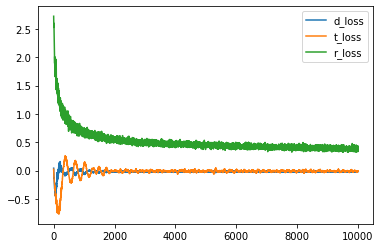

end train


In [7]:
model.train()

# model predict

In [8]:
x_test = final_test_data[x_col]
y_test = final_test_data[y_col]

In [9]:
adda_y_hat = model.predict(x_test)
adda_y_hat.index = x_test.index
xgb_200_y_hat = pd.DataFrame(xgb_200.predict(x_test),index=x_test.index,columns=y_col)
xgb_4765_y_hat = pd.DataFrame(xgb_4765.predict(x_test),index=x_test.index,columns=y_col)

# evaluate

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_metrics(y_pred,y_real):
  res = pd.DataFrame(index=y_pred.columns,columns=['R2','RMSE','MAPE'])
  for i in y_pred.columns:
    res.loc[i,'R2'] = r2_score(y_real[i],y_pred[i])
    res.loc[i,'RMSE'] = np.sqrt(mean_squared_error(y_real[i],y_pred[i]))
    res.loc[i,'MAPE'] = mape(y_real[i],y_pred[i])
  res.loc['AVG'] = res.mean(axis=0)
  return res

In [11]:
adda_res = show_metrics(adda_y_hat,y_test)
adda_res.tail(1)

,R2,RMSE,MAPE
AVG,0.734594,0.814029,40.4112


In [12]:
xgb_200_res = show_metrics(xgb_200_y_hat,y_test)
xgb_200_res.tail(1)

,R2,RMSE,MAPE
AVG,-3.17705,3.27755,1185.32


In [13]:
xgb_4765_res = show_metrics(xgb_4765_y_hat,y_test)
xgb_4765_res.tail(1)

,R2,RMSE,MAPE
AVG,-13.6168,4.18496,1236.41


# check total == 100

In [14]:
adda_y_hat.sum(axis=1).head(5)

115     97.536636
216     99.369545
178     98.258568
60     101.876869
12      98.426643
dtype: float32

In [15]:
xgb_200_y_hat.sum(axis=1).head(5)

115    111.593193
216    111.593193
178    111.593193
60     111.593193
12     111.593193
dtype: float32

In [16]:
xgb_4765_y_hat.sum(axis=1).head(5)

115    110.534447
216    110.534447
178    110.534447
60     110.534447
12     110.534447
dtype: float32

# check total N+A == N+A

In [17]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

48.9589729309082 49.637986179446976
52.388877868652344 52.883737861716874
58.646392822265625 59.781739028355524
46.70513153076172 46.28763321527297
38.27033615112305 38.53621981282379


In [18]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

65.38634490966797 49.637986179446976
65.38634490966797 52.883737861716874
65.38634490966797 59.781739028355524
65.38634490966797 46.28763321527297
65.38634490966797 38.53621981282379


In [19]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

77.15650939941406 49.637986179446976
77.15650939941406 52.883737861716874
77.15650939941406 59.781739028355524
77.15650939941406 46.28763321527297
77.15650939941406 38.53621981282379


# convert_predict 後處理 以符合案子需求

In [20]:
x_test['P'] = 100 - x_test['N+A']

In [21]:
def convert_predict(y_pred):
  y_pred[N_col] = normalize(y_pred[N_col])*x_test[['N+A']].values
  y_pred[P_col] = normalize(y_pred[P_col])*x_test[['P']].values
  return y_pred

In [22]:
show_metrics(convert_predict(adda_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,0.747841,0.800051,40.4024


In [23]:
show_metrics(convert_predict(xgb_4765_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-5.85953,3.67654,666.14


In [24]:
show_metrics(convert_predict(xgb_200_y_hat),y_test).tail(1)

,R2,RMSE,MAPE
AVG,-2.9864,2.87939,699.394


# after convert check total and N+A sum

In [25]:
convert_predict(adda_y_hat).sum(axis=1).head(5)

115    100.0
216    100.0
178    100.0
60     100.0
12     100.0
dtype: float64

In [26]:
convert_predict(xgb_4765_y_hat).sum(axis=1).head(5)

115    100.0
216    100.0
178    100.0
60     100.0
12     100.0
dtype: float64

In [27]:
convert_predict(xgb_200_y_hat).sum(axis=1).head(5)

115    100.0
216    100.0
178    100.0
60     100.0
12     100.0
dtype: float64

In [28]:
for i,j in zip(adda_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

49.63798617944699 49.637986179446976
52.883737861716874 52.883737861716874
59.78173902835553 59.781739028355524
46.28763321527297 46.28763321527297
38.53621981282379 38.53621981282379


In [29]:
for i,j in zip(xgb_200_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

49.63798617944699 49.637986179446976
52.88373786171687 52.883737861716874
59.78173902835552 59.781739028355524
46.287633215272976 46.28763321527297
38.53621981282378 38.53621981282379


In [30]:
for i,j in zip(xgb_4765_y_hat[N_col].sum(axis=1).head(),x_test['N+A'].head()):
  print(i,j)

49.637986179446976 49.637986179446976
52.88373786171688 52.883737861716874
59.78173902835553 59.781739028355524
46.287633215272976 46.28763321527297
38.53621981282378 38.53621981282379
